# 💎 **Diamond Price Prediction: The 4C Model**

# 📚 1. INTRODUCTION
___

<div style="font-family: Avenir, sans-serif; font-size: 16px; line-height: 1.6; color: white; background-color: #333; padding: 10px; border-radius: 5px;">
This section provides an overview of the dataset and the problem we are trying to solve. We will also discuss the methodology and the tools we will use to solve the problem.

</div>

### **Overview**

The Diamond Price Prediction project aims to build a machine learning model that accurately estimates the price of a diamond based on its attributes such as carat, cut, color, clarity, depth, and dimensions. The project will involve data collection, preprocessing, feature engineering, model training, and deployment through a Streamlit web application.

Link to Dataset: https://www.kaggle.com/datasets/willianoliveiragibin/type-of-the-diamond

### **Objectives**
**Exploratory Data Analysis:**  
- Perform statistical analysis and visualizations to understand relationships between attributes.
- Handle missing values, outliers, and categorical encoding for machine learning.

**Model Development:**
- Engineer new features (e.g., price per carat, light reflection efficiency, etc.) to improve model accuracy.
- Train regression models (e.g., Linear Regression, Decision Trees, Random Forest, Gradient Boosting, XGBoost) to predict diamond prices.
- Perform hyperparameter tuning and evaluate models using RMSE, MAE, and R² scores.
- Select the best-performing model for deployment.

**Model Deployment:**
- Develop an interactive Streamlit web app where users can input diamond attributes and receive a predicted price.
- Deploy the app on Streamlit Community Cloud or another hosting service.


### **Library**

In [136]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder


# 📚 2. DATA PROCESSING
___

<div style="font-family: Avenir, sans-serif; font-size: 16px; line-height: 1.6; color: white; background-color: #333; padding: 10px; border-radius: 5px;">
This section will focus on data preprocessing, including handling missing values, encoding categorical variables, and scaling numerical features. We will also perform exploratory data analysis to understand the distribution of attributes and relationships between them.

</div>

In [137]:
df = pd.read_csv('data.csv')
df

,cut,color,clarity,carat,depth,table,price,x (Premium),z (Very Good),y (Good)
0,Fair,E,VS2,0.22,65.1,61.0,337,3.87,2.49,3.78
1,Fair,E,SI2,0.86,55.1,69.0,2757,6.45,3.52,6.33
2,Fair,F,SI2,0.96,66.3,62.0,2759,6.27,4.07,5.95
3,Fair,F,VS2,0.70,64.5,57.0,2762,5.57,3.58,5.53
4,Fair,F,VS2,0.70,65.3,55.0,2762,5.63,3.66,5.58
...,...,...,...,...,...,...,...,...,...,...
53935,Very Good,E,VS2,0.70,62.8,60.0,2755,5.59,3.53,5.65
53936,Very Good,D,VS1,0.70,63.1,59.0,2755,5.67,3.55,5.58
53937,Very Good,E,VS2,0.70,60.5,59.0,2757,5.71,3.47,5.76
53938,Very Good,E,VS2,0.70,61.2,59.0,2757,5.69,3.49,5.72


In [138]:
#  check for the data types of the columns
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   cut            53940 non-null  object 
 1   color          53940 non-null  object 
 2   clarity        53940 non-null  object 
 3   carat          53940 non-null  float64
 4   depth          53940 non-null  float64
 5   table          53940 non-null  float64
 6   price          53940 non-null  int64  
 7   x (Premium)    53940 non-null  float64
 8   z (Very Good)  53940 non-null  float64
 9   y (Good)       53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [139]:
df.shape

(53940, 10)

In [140]:
# rename the columns
df.rename(columns={
    'x (Premium)':'premium_quality', 
    'z (Very Good)':'very_good_quality',
    'y (Good)':'good_quality',
    }, inplace=True)

In [141]:
# check the convert the data types of the columns
df.columns.to_list()

['cut',
 'color',
 'clarity',
 'carat',
 'depth',
 'table',
 'price',
 'premium_quality',
 'very_good_quality',
 'good_quality']

In [142]:
# check for the missing values
df.isnull().sum()

cut                  0
color                0
clarity              0
carat                0
depth                0
table                0
price                0
premium_quality      0
very_good_quality    0
good_quality         0
dtype: int64

In [143]:
# separate numerical and categorical columns
numerical = df.select_dtypes(include=['float64', 'int64'])
categorical = df.select_dtypes(include=['object'])

In [144]:
numerical

,carat,depth,table,price,premium_quality,very_good_quality,good_quality
0,0.22,65.1,61.0,337,3.87,2.49,3.78
1,0.86,55.1,69.0,2757,6.45,3.52,6.33
2,0.96,66.3,62.0,2759,6.27,4.07,5.95
3,0.70,64.5,57.0,2762,5.57,3.58,5.53
4,0.70,65.3,55.0,2762,5.63,3.66,5.58
...,...,...,...,...,...,...,...
53935,0.70,62.8,60.0,2755,5.59,3.53,5.65
53936,0.70,63.1,59.0,2755,5.67,3.55,5.58
53937,0.70,60.5,59.0,2757,5.71,3.47,5.76
53938,0.70,61.2,59.0,2757,5.69,3.49,5.72


In [145]:
categorical

,cut,color,clarity
0,Fair,E,VS2
1,Fair,E,SI2
2,Fair,F,SI2
3,Fair,F,VS2
4,Fair,F,VS2
...,...,...,...
53935,Very Good,E,VS2
53936,Very Good,D,VS1
53937,Very Good,E,VS2
53938,Very Good,E,VS2


In [146]:
numerical.describe().round(2)

,carat,depth,table,price,premium_quality,very_good_quality,good_quality
count,53940.00,53940.00,53940.00,53940.00,53940.00,53940.00,53940.00
mean,0.80,61.75,57.46,3932.80,5.73,3.54,5.73
std,0.47,1.43,2.23,3989.44,1.12,0.71,1.14
min,0.20,43.00,43.00,326.00,0.00,0.00,0.00
25%,0.40,61.00,56.00,950.00,4.71,2.91,4.72
50%,0.70,61.80,57.00,2401.00,5.70,3.53,5.71
75%,1.04,62.50,59.00,5324.25,6.54,4.04,6.54
max,5.01,79.00,95.00,18823.00,10.74,31.80,58.90


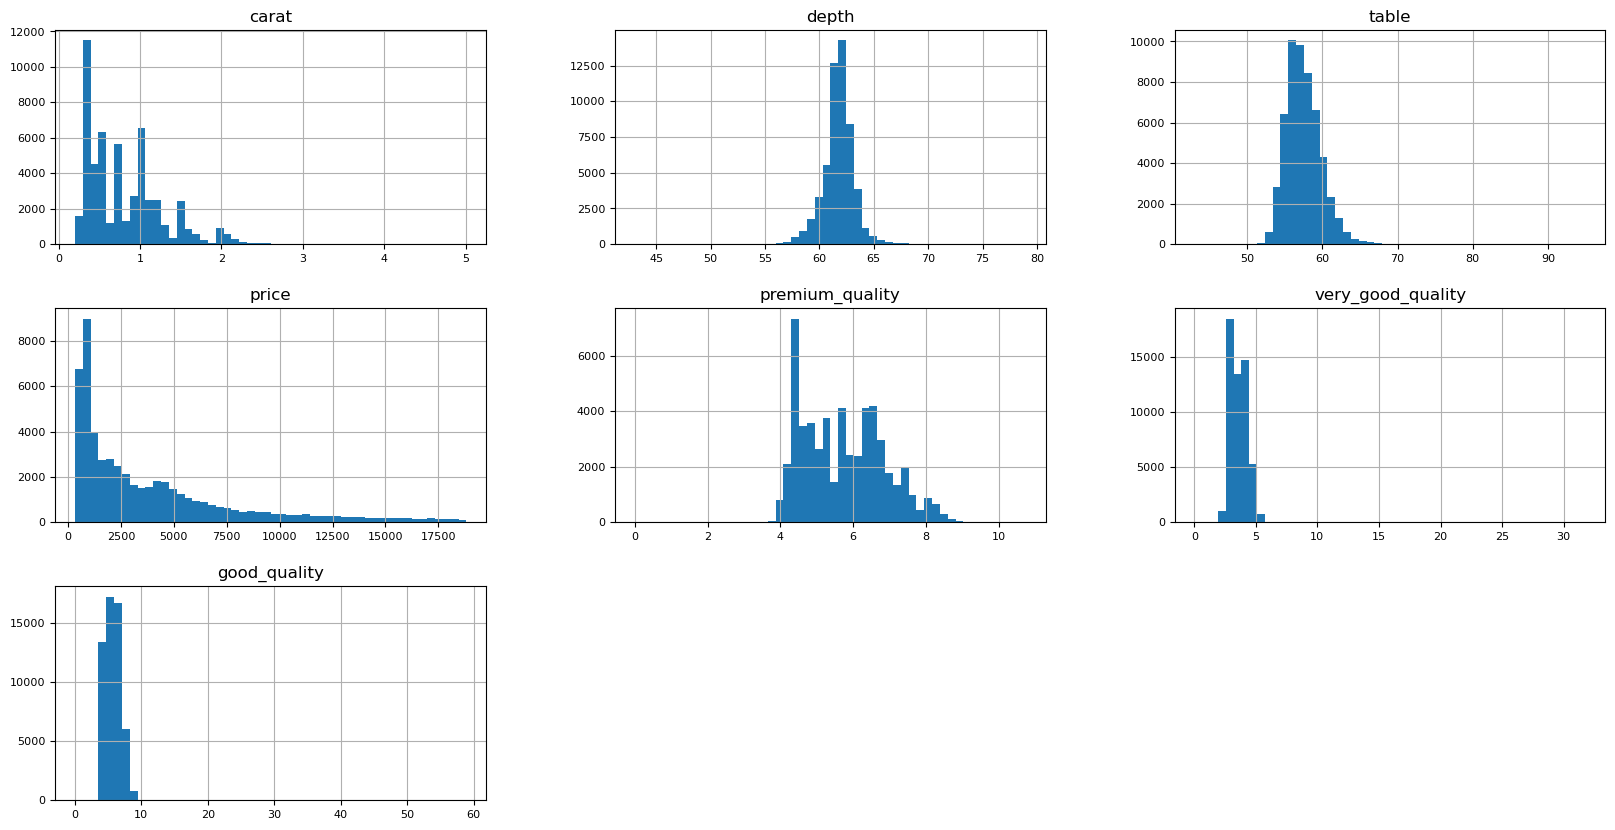

In [147]:
numerical.hist(figsize=(20, 10), bins=50, xlabelsize=8, ylabelsize=8)
plt.show()

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   cut                53940 non-null  object 
 1   color              53940 non-null  object 
 2   clarity            53940 non-null  object 
 3   carat              53940 non-null  float64
 4   depth              53940 non-null  float64
 5   table              53940 non-null  float64
 6   price              53940 non-null  int64  
 7   premium_quality    53940 non-null  float64
 8   very_good_quality  53940 non-null  float64
 9   good_quality       53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [155]:
from sklearn.impute import SimpleImputer

# Define transformers
ct = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['carat', 'depth', 'table', 'price', 'premium_quality', 'very_good_quality', 'good_quality']),
        ('cat', OneHotEncoder(), ['cut', 'color', 'clarity'])
    ],
    remainder='drop'
)

# Step 3: Fit and transform the DataFrame
X_transformed = ct.fit_transform(df)
X_transformed_array = np.array(X_transformed)


In [156]:
transformed_data.shape

(53940, 27)

In [157]:
transformed_data = pd.DataFrame(transformed_data, columns=['carat', 'depth', 'table', 'price', 'premium_quality', 'very_good_quality', 'good_quality', 'cut_Fair', 'cut_Good', 'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'color_D', 'color_E', 'color_F', 'color_G', 'color_H', 'color_I', 'color_J', 'clarity_I1', 'clarity_IF', 'clarity_SI1', 'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2'])
transformed_data

,carat,depth,table,price,premium_quality,very_good_quality,good_quality,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,-1.219265,2.338808,1.585529,-0.901338,-1.659155,-1.486106,-1.711308,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.130927,-4.641468,5.165796,-0.294731,0.640822,-0.026547,0.521374,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.341894,3.176441,2.033062,-0.294229,0.480359,0.752830,0.188661,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,-0.206621,1.919991,-0.204605,-0.293477,-0.143666,0.058476,-0.179075,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-0.206621,2.478414,-1.099672,-0.293477,-0.090178,0.171840,-0.135297,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,-0.206621,0.733344,1.137995,-0.295232,-0.125837,-0.012376,-0.074008,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
53936,-0.206621,0.942753,0.690462,-0.295232,-0.054519,0.015965,-0.135297,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
53937,-0.206621,-0.872119,0.690462,-0.294731,-0.018861,-0.097399,0.022304,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
53938,-0.206621,-0.383500,0.690462,-0.294731,-0.036690,-0.069058,-0.012718,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [154]:
get_feature_names_out()

NameError: name 'get_feature_names_out' is not defined

# 📚 3. EXPLORATORY DATA ANALYSIS
___

<div style="font-family: Avenir, sans-serif; font-size: 16px; line-height: 1.6; color: white; background-color: #333; padding: 10px; border-radius: 5px;">
This section deals with data collection from YouTube using the YouTube API and writing Python scripts to fetch comments.

</div>

# 📚 3. SETTING UP THE VALIDATION FRAMEWORK
___

<div style="font-family: Avenir, sans-serif; font-size: 16px; line-height: 1.6; color: white; background-color: #333; padding: 10px; border-radius: 5px;">
This section deals with the setup of the database and the integration of the collected data to the database.

</div>

# 📚 4. BUILDING AND TRAINING THE MODEL
___

<div style="font-family: Avenir, sans-serif; font-size: 16px; line-height: 1.6; color: white; background-color: #333; padding: 10px; border-radius: 5px;">
This section deals with ...

</div>

# 📚 5. EVALUATING THE MODEL
___

<div style="font-family: Avenir, sans-serif; font-size: 16px; line-height: 1.6; color: white; background-color: #333; padding: 10px; border-radius: 5px;">
This section deals with ...

</div>

# 📚 6. MODEL DEPLOYMENT
___

<div style="font-family: Avenir, sans-serif; font-size: 16px; line-height: 1.6; color: white; background-color: #333; padding: 10px; border-radius: 5px;">
This section deals with ...

</div>